## Assume that con is uniformly distruibuted on the interval $[s, h]$

In [1]:
import numpy as np
import logging
import matplotlib.pyplot as plt

logging.basicConfig()
logger = logging.getLogger("uniform")
logger.setLevel(logging.ERROR)
EPSILON = 0.000001

In [2]:
def myround(num):
    num = num if abs(num) > EPSILON else 0
    return num


def scenario_check(p, c, s, h):
    if myround(p - 4*(c-s))>= 0:
        return 2
    elif myround(p - 4*(c-h)) <= 0:
        return 3
    else:
        return 1


def calculate_demand(p, c,s, h, scenario):
    if scenario == 1:
        alpha_o = 1/(2*(h-s)) * (2- min(1, p+2*c) - min(1, 3/2*p+ 2*s))*(
            min(c-1/4*p, 1/2 - 3/4*p) - min(s,1/2 -3/4*p))
        alpha_s = 1/(h-s) * (1-min(1,p+2*c))*(h - min(c-1/4*p, 1/2-3/4*p))
    elif scenario == 2:                                     
        alpha_o=0
        alpha_s= 1/(h-s)*(1-min(1,p+2*c))*(h-s)
    else:
        alpha_s = 0
        alpha_o = 1/(2*(h-s)) *(2-min(1, 3/2*p+2*h) - min(1, 3/2*p+2*s))*(min(h, 1/2-3/4*p)-min(s, 1/2-3/4*p))
    alpha_o = myround(alpha_o)
    alpha_s = myround(alpha_s)
    if 0 <= alpha_o <= 1 and 0 <= alpha_s <= 1:
        return alpha_o, alpha_s
    else:
        print("c: {}, s:{}, h:{}, p: {:.3f}, scenario: {}".format(
            c,s, h, p, scenario))
        print("alpha_o:{:.5f}, alpha_s: {:.5f}".format(alpha_o, alpha_s))
        raise Exception("error prior demand!")


def calculate_profit(cr, p, alpha_o, alpha_s):
    online_profit = alpha_o * (
            1 / 2 * p + 1 / 2 * (1 / 2 * p - 1 / 2 * cr))  # w.p. 1/2, b=b_H. Then w.p. 1/2 consumer returns it.
    store_profit = alpha_s * 1 / 2 * p  # w.p. 1/2, b=b_H
    profit = 1 / 2 * store_profit + 1 / 2 * online_profit  # w.p. 1/2, a=a_H
    return profit


In [3]:
class uniform:
    def __init__(self, c, cr, s, h, step=0.01):
        self.optimal_profit = 0
        self.optimal_p = 0
        self.alpha_o = 0
        self.alpha_s = 0

        self.solve_equilibrium(c, cr, s, h, step)

    def solve_equilibrium(self, c, cr, s, h, step=0.01):
        for p in np.arange(0, 1, step):
            current_scenario = scenario_check(p=p, c=c, s=s, h=h)
            alpha_o, alpha_s = calculate_demand(p=p, c=c, s=s, h=h, scenario=current_scenario)

            current_profit = calculate_profit(cr=cr, p=p, alpha_o=alpha_o, alpha_s=alpha_s)
            logger.info("current p: {:.3f}, scenario: {}, alpha_s: {:.3f}, alpha_o: {:.3f}, profit: {:.5f}".format(
                p, current_scenario, alpha_s, alpha_o, current_profit))

            if myround(self.optimal_profit - current_profit) < 0:
                self.optimal_profit = current_profit
                self.optimal_p = p
                self.alpha_o = alpha_o
                self.alpha_s = alpha_s
        logger.info("optimal price: {:.5f}, profit: {:.5f}".format(self.optimal_p, self.optimal_profit))
        logger.info("online demand: {:.3f}, offline demand: {:.5f}".format(self.alpha_o, self.alpha_s))


## Main Model 

In [4]:
# main model
logger.setLevel(logging.ERROR)
p_list = []
u_demand = []
piu_list = []

cr = 0.32
s = 0.049
h = 0.051
step = 0.0025
sel_c = np.arange(0.1, 0.151, 0.0025)
for c in sel_c:
    logger.debug("----------current c: {:.3f}---------".format(c))
    uniform_ins = uniform(c=c, cr=cr, s=s, h=h, step=step)

    p_list.append(uniform_ins.optimal_p)
    u_demand.append([uniform_ins.alpha_o, uniform_ins.alpha_s])
    piu_list.append(uniform_ins.optimal_profit)
    
    logger.debug("Uniform price: {:.3f}, uniform profit: {:.5f}".format(
        uniform_ins.optimal_p, uniform_ins.optimal_profit))


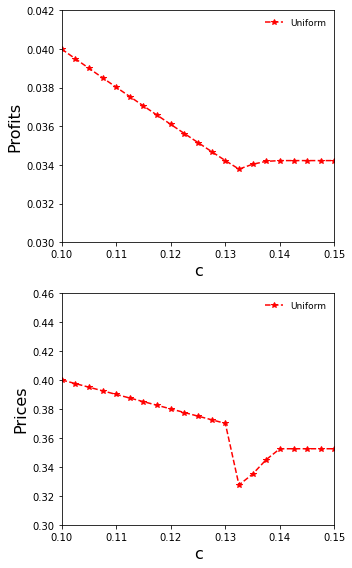

In [5]:
fig = plt.figure(figsize=(5, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(sel_c, piu_list, c='red', ls='--', ms=6, marker='*', label="Uniform")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(sel_c, p_list, c='red', ls='--', ms=6, marker='*', label="Uniform")

ax1.axis(ymin=0.03,ymax=0.042)
ax2.axis(ymin=0.30,ymax=0.46)
ax1.axis(xmin=0.1,xmax=0.15)
ax2.axis(xmin=0.1,xmax=0.15)

ax1.legend(prop=dict(size=9), frameon=False)
ax1.set_ylabel("Profits", fontsize=16)
ax1.set_xlabel("c", fontsize=16)
ax2.legend(prop=dict(size=9), frameon=False)
ax2.set_ylabel("Prices", fontsize=16)
ax2.set_xlabel("c", fontsize=16)
plt.tight_layout()
plt.show()

## Test

In [21]:
logger.setLevel(logging.ERROR)
p_list = []
u_demand = []
piu_list = []

cr = 0.32
s = 0.00
h = 0.10
step = 0.005
sel_c = np.arange(0.1, 0.2, 0.005)
for c in sel_c:
    logger.debug("----------current c: {:.3f}---------".format(c))
    uniform_ins = uniform(c=c, cr=cr, s=s, h=h, step=step)

    p_list.append(uniform_ins.optimal_p)
    u_demand.append([uniform_ins.alpha_o, uniform_ins.alpha_s])
    piu_list.append(uniform_ins.optimal_profit)
    
    logger.debug("Uniform price: {:.3f}, uniform profit: {:.5f}".format(
        uniform_ins.optimal_p, uniform_ins.optimal_profit))

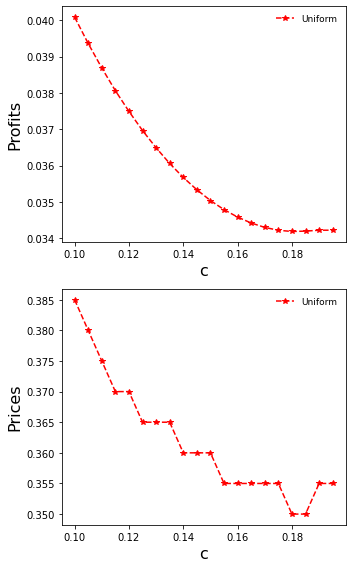

In [22]:
fig = plt.figure(figsize=(5, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(sel_c, piu_list, c='red', ls='--', ms=6, marker='*', label="Uniform")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(sel_c, p_list, c='red', ls='--', ms=6, marker='*', label="Uniform")

# ax1.axis(ymin=0.03,ymax=0.042)
# ax2.axis(ymin=0.33,ymax=0.45)
# ax1.axis(xmin=0.1,xmax=0.18)
# ax2.axis(xmin=0.1,xmax=0.18)

ax1.legend(prop=dict(size=9), frameon=False)
ax1.set_ylabel("Profits", fontsize=16)
ax1.set_xlabel("c", fontsize=16)
ax2.legend(prop=dict(size=9), frameon=False)
ax2.set_ylabel("Prices", fontsize=16)
ax2.set_xlabel("c", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
logger.setLevel(logging.ERROR)
p_list = []
u_demand = []
piu_list = []

cr = 0.32
s = 0.03
h = 0.07
step = 0.0025
sel_c = np.arange(0.1, 0.171, 0.0025)
for c in sel_c:
    logger.debug("----------current c: {:.3f}---------".format(c))
    uniform_ins = uniform(c=c, cr=cr, s=s, h=h, step=step)

    p_list.append(uniform_ins.optimal_p)
    u_demand.append([uniform_ins.alpha_o, uniform_ins.alpha_s])
    piu_list.append(uniform_ins.optimal_profit)
    
    logger.debug("Uniform price: {:.3f}, uniform profit: {:.5f}".format(
        uniform_ins.optimal_p, uniform_ins.optimal_profit))

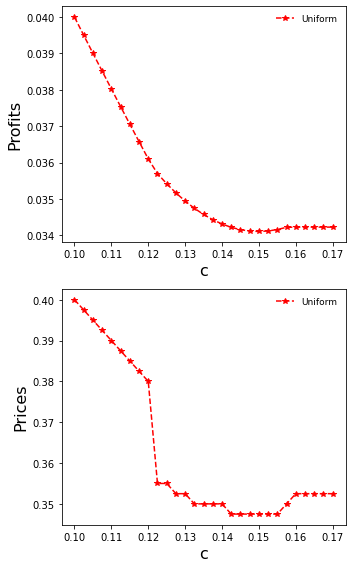

In [7]:
fig = plt.figure(figsize=(5, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(sel_c, piu_list, c='red', ls='--', ms=6, marker='*', label="Uniform")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(sel_c, p_list, c='red', ls='--', ms=6, marker='*', label="Uniform")

# ax1.axis(ymin=0.03,ymax=0.042)
# ax2.axis(ymin=0.33,ymax=0.45)
# ax1.axis(xmin=0.1,xmax=0.18)
# ax2.axis(xmin=0.1,xmax=0.18)

ax1.legend(prop=dict(size=9), frameon=False)
ax1.set_ylabel("Profits", fontsize=16)
ax1.set_xlabel("c", fontsize=16)
ax2.legend(prop=dict(size=9), frameon=False)
ax2.set_ylabel("Prices", fontsize=16)
ax2.set_xlabel("c", fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
logger.setLevel(logging.INFO)
uniform_ins = uniform(c=0.125, cr=0.32, s=0.049, h=0.051, step=0.0025)

INFO:uniform:current p: 0.000, scenario: 3, alpha_s: 0.000, alpha_o: 0.900, profit: -0.03600
INFO:uniform:current p: 0.003, scenario: 3, alpha_s: 0.000, alpha_o: 0.896, profit: -0.03501
INFO:uniform:current p: 0.005, scenario: 3, alpha_s: 0.000, alpha_o: 0.893, profit: -0.03403
INFO:uniform:current p: 0.007, scenario: 3, alpha_s: 0.000, alpha_o: 0.889, profit: -0.03305
INFO:uniform:current p: 0.010, scenario: 3, alpha_s: 0.000, alpha_o: 0.885, profit: -0.03208
INFO:uniform:current p: 0.013, scenario: 3, alpha_s: 0.000, alpha_o: 0.881, profit: -0.03112
INFO:uniform:current p: 0.015, scenario: 3, alpha_s: 0.000, alpha_o: 0.878, profit: -0.03016
INFO:uniform:current p: 0.018, scenario: 3, alpha_s: 0.000, alpha_o: 0.874, profit: -0.02922
INFO:uniform:current p: 0.020, scenario: 3, alpha_s: 0.000, alpha_o: 0.870, profit: -0.02827
INFO:uniform:current p: 0.022, scenario: 3, alpha_s: 0.000, alpha_o: 0.866, profit: -0.02734
INFO:uniform:current p: 0.025, scenario: 3, alpha_s: 0.000, alpha_o: 0

INFO:uniform:current p: 0.223, scenario: 3, alpha_s: 0.000, alpha_o: 0.566, profit: 0.02460
INFO:uniform:current p: 0.225, scenario: 3, alpha_s: 0.000, alpha_o: 0.562, profit: 0.02496
INFO:uniform:current p: 0.228, scenario: 3, alpha_s: 0.000, alpha_o: 0.559, profit: 0.02532
INFO:uniform:current p: 0.230, scenario: 3, alpha_s: 0.000, alpha_o: 0.555, profit: 0.02567
INFO:uniform:current p: 0.233, scenario: 3, alpha_s: 0.000, alpha_o: 0.551, profit: 0.02601
INFO:uniform:current p: 0.235, scenario: 3, alpha_s: 0.000, alpha_o: 0.548, profit: 0.02635
INFO:uniform:current p: 0.238, scenario: 3, alpha_s: 0.000, alpha_o: 0.544, profit: 0.02668
INFO:uniform:current p: 0.240, scenario: 3, alpha_s: 0.000, alpha_o: 0.540, profit: 0.02700
INFO:uniform:current p: 0.242, scenario: 3, alpha_s: 0.000, alpha_o: 0.536, profit: 0.02732
INFO:uniform:current p: 0.245, scenario: 3, alpha_s: 0.000, alpha_o: 0.532, profit: 0.02762
INFO:uniform:current p: 0.247, scenario: 3, alpha_s: 0.000, alpha_o: 0.529, prof

INFO:uniform:current p: 0.448, scenario: 2, alpha_s: 0.302, alpha_o: 0.000, profit: 0.03384
INFO:uniform:current p: 0.450, scenario: 2, alpha_s: 0.300, alpha_o: 0.000, profit: 0.03375
INFO:uniform:current p: 0.453, scenario: 2, alpha_s: 0.297, alpha_o: 0.000, profit: 0.03365
INFO:uniform:current p: 0.455, scenario: 2, alpha_s: 0.295, alpha_o: 0.000, profit: 0.03356
INFO:uniform:current p: 0.458, scenario: 2, alpha_s: 0.292, alpha_o: 0.000, profit: 0.03345
INFO:uniform:current p: 0.460, scenario: 2, alpha_s: 0.290, alpha_o: 0.000, profit: 0.03335
INFO:uniform:current p: 0.463, scenario: 2, alpha_s: 0.287, alpha_o: 0.000, profit: 0.03324
INFO:uniform:current p: 0.465, scenario: 2, alpha_s: 0.285, alpha_o: 0.000, profit: 0.03313
INFO:uniform:current p: 0.468, scenario: 2, alpha_s: 0.283, alpha_o: 0.000, profit: 0.03302
INFO:uniform:current p: 0.470, scenario: 2, alpha_s: 0.280, alpha_o: 0.000, profit: 0.03290
INFO:uniform:current p: 0.473, scenario: 2, alpha_s: 0.277, alpha_o: 0.000, prof

INFO:uniform:current p: 0.672, scenario: 2, alpha_s: 0.078, alpha_o: 0.000, profit: 0.01303
INFO:uniform:current p: 0.675, scenario: 2, alpha_s: 0.075, alpha_o: 0.000, profit: 0.01266
INFO:uniform:current p: 0.677, scenario: 2, alpha_s: 0.073, alpha_o: 0.000, profit: 0.01228
INFO:uniform:current p: 0.680, scenario: 2, alpha_s: 0.070, alpha_o: 0.000, profit: 0.01190
INFO:uniform:current p: 0.682, scenario: 2, alpha_s: 0.068, alpha_o: 0.000, profit: 0.01152
INFO:uniform:current p: 0.685, scenario: 2, alpha_s: 0.065, alpha_o: 0.000, profit: 0.01113
INFO:uniform:current p: 0.688, scenario: 2, alpha_s: 0.062, alpha_o: 0.000, profit: 0.01074
INFO:uniform:current p: 0.690, scenario: 2, alpha_s: 0.060, alpha_o: 0.000, profit: 0.01035
INFO:uniform:current p: 0.693, scenario: 2, alpha_s: 0.058, alpha_o: 0.000, profit: 0.00995
INFO:uniform:current p: 0.695, scenario: 2, alpha_s: 0.055, alpha_o: 0.000, profit: 0.00956
INFO:uniform:current p: 0.698, scenario: 2, alpha_s: 0.052, alpha_o: 0.000, prof

INFO:uniform:current p: 0.897, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.900, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.902, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.905, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.907, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.910, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.912, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.915, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.917, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.920, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, profit: 0.00000
INFO:uniform:current p: 0.922, scenario: 2, alpha_s: 0.000, alpha_o: 0.000, prof

In [9]:
p=0.38
s=0.04
h=0.06
cr=0.32
c=0.12
current_scenario=scenario_check(p=p, c=c, s=s, h=h)
print("scenario: {}".format(current_scenario))
alpha_o, alpha_s = calculate_demand(p=p, c=c,s=s, h=h, scenario=current_scenario)
print("online demand: {:.5f}, offline demand: {:.5f}".format(alpha_o,alpha_s))
profit = calculate_profit(cr=cr, p=p, alpha_o=alpha_o, alpha_s=alpha_s)
print("profit: {:.8f}".format(profit))

scenario: 2
online demand: 0.00000, offline demand: 0.38000
profit: 0.03610000


### TEST 

In [10]:
print("boundary: {:.3f}, {:.3f}".format(4*(c-h),4*(c-s)))

boundary: 0.240, 0.320


In [11]:
p=0.34
s=0.04
h=0.06
cr=0.32
c=0.14
current_scenario=scenario_check(p=p, c=c, s=s, h=h)
print("scenario: {}".format(current_scenario))
alpha_o, alpha_s = calculate_demand(p=p, c=c,s=s, h=h, scenario=current_scenario)
print("online demand: {:.5f}, offline demand: {:.5f}".format(alpha_o,alpha_s))
profit = calculate_profit(cr=cr, p=p, alpha_o=alpha_o, alpha_s=alpha_s)
print("profit: {:.8f}".format(profit))

scenario: 1
online demand: 0.29625, offline demand: 0.09500
profit: 0.03399687


In [12]:
p=0.35
s=0.04
h=0.06
cr=0.32
c=0.14
current_scenario=scenario_check(p=p, c=c, s=s, h=h)
print("scenario: {}".format(current_scenario))
alpha_o, alpha_s = calculate_demand(p=p, c=c,s=s, h=h, scenario=current_scenario)
print("online demand: {:.5f}, offline demand: {:.5f}".format(alpha_o,alpha_s))
profit = calculate_profit(cr=cr, p=p, alpha_o=alpha_o, alpha_s=alpha_s)
print("profit: {:.8f}".format(profit))

scenario: 1
online demand: 0.23906, offline demand: 0.13875
profit: 0.03395508


In [13]:
p=0.33
s=0.04
h=0.06
cr=0.32
c=0.14
current_scenario=scenario_check(p=p, c=c, s=s, h=h)
print("scenario: {}".format(current_scenario))
alpha_o, alpha_s = calculate_demand(p=p, c=c,s=s, h=h, scenario=current_scenario)
print("online demand: {:.5f}, offline demand: {:.5f}".format(alpha_o,alpha_s))
profit = calculate_profit(cr=cr, p=p, alpha_o=alpha_o, alpha_s=alpha_s)
print("profit: {:.8f}".format(profit))

scenario: 1
online demand: 0.35656, offline demand: 0.04875
profit: 0.03388398
